<a href="https://colab.research.google.com/github/gxorge13/ObjectDetectorHotdog/blob/main/Hotdog_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

In [ ]:
import torch
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
from pathlib import Path
from google.colab import drive, files
import os

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_img_dir = r'/content/drive/My Drive/Hot Dog Detection YOLO/train/images'
val_img_dir = r'/content/drive/My Drive/Hot Dog Detection YOLO/valid/images'
train_labels_dir = r'/content/drive/My Drive/Hot Dog Detection YOLO/train/labels'
val_labels_dir = r'/content/drive/My Drive/Hot Dog Detection YOLO/valid/labels'

In [ ]:
model = YOLO('yolov8n.pt')


In [ ]:
def load_dataset(image_dir, label_dir):
    img_paths = list(Path(image_dir).rglob('*.jpg'))
    label_paths = list(Path(label_dir).rglob('*.txt'))
    return img_paths, label_paths

In [ ]:
# Step 6: Load training and validation datasets
train_imgs, train_labels = load_dataset(train_img_dir, train_labels_dir)
val_imgs, val_labels = load_dataset(val_img_dir, val_labels_dir)

In [ ]:
# Step 4: Check for mismatches between image and label files
def check_image_label_mismatch(image_dir, label_dir):
    images = {os.path.splitext(f)[0] for f in os.listdir(image_dir)}  # Strip file extensions
    labels = {os.path.splitext(f)[0] for f in os.listdir(label_dir)}  # Strip file extensions

    extra_labels = labels - images
    extra_images = images - labels
    print(f"Extra Labels (no corresponding images): {extra_labels}")
    print(f"Extra Images (no corresponding labels): {extra_images}")

    return extra_labels, extra_images

Checking Training Dataset for Mismatches...
Extra Labels (no corresponding images): set()
Extra Images (no corresponding labels): set()
Checking Validation Dataset for Mismatches...
Extra Labels (no corresponding images): set()
Extra Images (no corresponding labels): set()


In [ ]:
print("\n-------------------------------------------------------------------------------")
print("Checking Training Dataset for Mismatches...")
extra_train_labels, extra_train_images = check_image_label_mismatch(train_img_dir, train_labels_dir)

print("Checking Validation Dataset for Mismatches...")
extra_val_labels, extra_val_images = check_image_label_mismatch(val_img_dir, val_labels_dir)
print("---------------------------------------------------------------------------------")

In [ ]:
def delete_extra_labels(extra_labels, label_dir):
    for label in extra_labels:
        label_path = os.path.join(label_dir, label + '.txt')  # Label files are .txt
        if os.path.exists(label_path):
            os.remove(label_path)
            print(f"Deleted: {label_path}")
        else:
            print(f"File not found: {label_path}")

def delete_extra_imgs(extra_imgs, img_dir):
    for img in extra_imgs:
        img_path = os.path.join(img_dir, img + '.jpg')  # Label files are .txt
        if os.path.exists(img_path):
            os.remove(img_path)
            print(f"Deleted: {img_path}")
        else:
            print(f"File not found: {img_path}")

File not found: /content/drive/My Drive/Hot Dog Detection YOLO/train/labels/hotdog-128_jpg.rf.df476fab544713a438e1a1040b2aaa53.txt
File not found: /content/drive/My Drive/Hot Dog Detection YOLO/train/labels/hotdog-128_jpg.rf.a881e218cf7a71e4d68fe5c108a97a25.txt


In [ ]:
delete_extra_labels(extra_val_labels, val_labels_dir)
delete_extra_labels(extra_train_labels, train_labels_dir)
delete_extra_imgs(extra_val_images, val_img_dir)
delete_extra_imgs(extra_train_images, train_img_dir)

In [ ]:
print("Deleted extra train imgs: ", len(train_labels) == len(train_imgs))
print("Deleted extra val imgs: "  , len(val_labels)   == len(val_imgs))

2488
2488


In [ ]:
data_yaml = """
train: /content/drive/My Drive/Hot Dog Detection YOLO/train/images
val: /content/drive/My Drive/Hot Dog Detection YOLO/valid/images
nc: 1
names: ['hotdog']
"""

with open('/content/drive/My Drive/Hot Dog Detection YOLO/data.yaml', 'w') as f:
    f.write(data_yaml)

In [ ]:
# Step 3: Use cuda if available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Step 4: Load YOLOv8 model (pre-trained) and move it to the GPU (or CPU if GPU not found)
model = YOLO('yolov8n.pt').to(device)

print(device)

cpu


In [ ]:
# model is good so far but needs to train for a lot longer. Lets also play with a lot more hyperparameters
results = model.train(data='/content/drive/My Drive/Hot Dog Detection YOLO/data.yaml',
                      epochs=100,              # Try with 50 epochs
                      imgsz=640,               # Or increase for better accuracy
                      batch=16,                # Keep or increase batch size
                      lr0=0.01,                # Good starting point for LR
                      momentum=0.937,          # Momentum
                      weight_decay=0.0005,     # Standard weight decay
                      label_smoothing=0.1,     # Smooths out labels
                      mosaic=1.0,              # Augmentation
                      flipud=0.0,              # No vertical flip
                      fliplr=0.5,              # Horizontal flip on
                      # auto_augment='randaugment',  # Enable auto augment
                      # conf=0.25,               # Confidence threshold
                      iou=0.7,                 # IoU threshold
                      name = 'hotdog_detector_test1')

engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/My Drive/Hot Dog Detection YOLO/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=hotdog_detectorv2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscri

100%|██████████| 755k/755k [00:00<00:00, 21.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: ERROR API key must be 40 characters long, yours was 10


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /content/drive/My Drive/Hot Dog Detection YOLO/train/labels.cache... 2488 images, 1 backgrounds, 0 corrupt: 100%|██████████| 2488/2488 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/My Drive/Hot Dog Detection YOLO/valid/labels.cache... 714 images, 1 backgrounds, 0 corrupt: 100%|██████████| 714/714 [00:00<?, ?it/s]


Plotting labels to runs/detect/hotdog_detectorv2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/hotdog_detectorv2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G       1.54      2.379      1.829         57        640:  79%|███████▉  | 123/156 [29:54<08:01, 14.59s/it]


KeyboardInterrupt: 

In [ ]:
# Test on validation set
metrics = model.val(data='/content/drive/My Drive/Hot Dog Detection YOLO/data.yaml',
                      epochs=70,               # Try with 70 epochs
                      imgsz=640,               # Or increase for better accuracy
                      batch=16,                # Keep or increase batch size
                      lr0=0.01,                # Good starting point for LR
                      momentum=0.937,          # Momentum
                      weight_decay=0.0005,     # Standard weight decay
                      label_smoothing=0.1,     # Smooths out labels
                      mosaic=1.0,              # Augmentation
                      flipud=0.0,              # No vertical flip
                      fliplr=0.5,              # Horizontal flip on
                      iou=0.7                 # IoU threshold
                      )# print(f"Validation Results: {metrics}")

Ultralytics 8.3.16 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/drive/My Drive/Hot Dog Detection YOLO/valid/labels.cache... 714 images, 1 backgrounds, 0 corrupt: 100%|██████████| 714/714 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:17<00:00,  2.57it/s]


                   all        714       1251       0.67       0.56      0.618      0.416
Speed: 0.5ms preprocess, 4.5ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/hotdog_detectorv23


In [ ]:
# # Test detection on a single image from validation set to test result
# test_img_path = str(val_imgs[3])
# img = cv2.imread(test_img_path)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converting image to RGB format

In [ ]:
# # Move the image to the GPU if using CUDA
# # img_tensor = torch.from_numpy(img).to(device)

# # Assuming 'img' is a numpy array (height, width, channels)
# img = cv2.resize(img, (640, 640))  # Resize to 640x640 to match model input requirements
# img = img.transpose(2, 0, 1)  # Change from HWC to CHW (channels first)
# img = img / 255.0  # Normalize pixel values to [0, 1] range

# # Convert numpy array to tensor and add batch dimension
# img_tensor = torch.from_numpy(img).unsqueeze(0).to(device)  # Add batch dimension (B=1)

# # Pass the tensor to the model
# results = model(img_tensor)



0: 640x640 2 hotdogs, 10.0ms
Speed: 0.2ms preprocess, 10.0ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
# if not Path(test_img_path).exists():
#     print(f"Image not found at {test_img_path}")
# else:
#     img = cv2.imread(test_img_path)
#     original_height, original_width = img.shape[:2]  # Get original dimensions

#     # Resize the image to maintain aspect ratio
#     img_resized = cv2.resize(img, (640, 640), interpolation=cv2.INTER_LINEAR)
#     img_resized = img_resized.transpose((2, 0, 1))  # Rearrange dimensions to CHW
#     img_resized = img_resized / 255.0  # Normalize pixel values
#     img_tensor = torch.from_numpy(img_resized).float().unsqueeze(0).to(device)  # Add batch dimension

#     # Run inference with the model
#     results = model(img_tensor)

#     # Extract predictions from the results
#     predictions = results[0].boxes.xyxy.cpu().numpy()  # Extract boxes in xyxy format

#     # Function to plot predictions on the image
#     def plot_images(original_img, predictions, original_shape):
#         img_with_boxes = original_img.copy()

#         # Check if any predictions were made
#         if len(predictions) == 0:
#             print("No predictions made.")
#             return

#         # Draw bounding boxes and labels on the copied image
#         for pred in predictions:
#             if len(pred) >= 4:  # Check for at least 4 values (x1, y1, x2, y2)
#                 x1, y1, x2, y2 = map(int, pred[:4])  # Extract box coordinates

#                 # Scale bounding box coordinates back to the original image size
#                 scale_x = original_shape[1] / 640
#                 scale_y = original_shape[0] / 640
#                 x1 = int(x1 * scale_x)
#                 x2 = int(x2 * scale_x)
#                 y1 = int(y1 * scale_y)
#                 y2 = int(y2 * scale_y)

#                 conf = pred[4] if len(pred) > 4 else None  # Get confidence if it exists
#                 cls = int(pred[5]) if len(pred) > 5 else None  # Get class if it exists

#                 # Draw bounding box
#                 cv2.rectangle(img_with_boxes, (x1, y1), (x2, y2), color=(255, 0, 0), thickness=2)

#                 # Display class and confidence if available
#                 if conf is not None and cls is not None:
#                     label = f'Class: {cls}, Conf: {conf:.2f}'
#                     cv2.putText(img_with_boxes, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

#         # Plot the original image
#         plt.figure(figsize=(12, 6))

#         plt.subplot(1, 2, 1)
#         plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
#         plt.title("Original Image")
#         plt.axis('off')  # Hide axes for better visualization

#         # Plot the image with bounding boxes
#         plt.subplot(1, 2, 2)
#         plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))  # Show the copied image with bounding boxes
#         plt.title("Detected Hot Dogs")
#         plt.axis('off')  # Hide axes for better visualization

#         plt.show()

#     # Call the function to plot the images
#     plot_images(img, predictions, (original_height, original_width))


0: 640x640 (no detections), 45.7ms
Speed: 0.0ms preprocess, 45.7ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)
No predictions made.


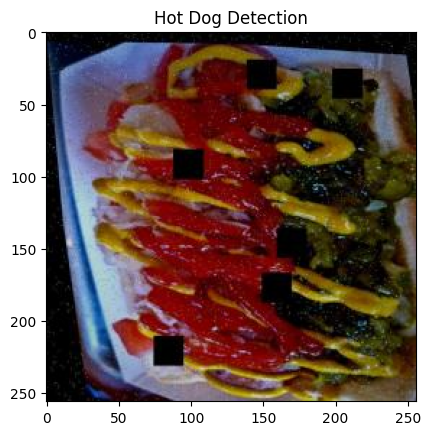

In [ ]:
# # Visualize the result by "plotting" the image using cv2 and plt
# def plot_image(img_path, predictions):
#     img = cv2.imread(img_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     plt.imshow(img)
#     plt.title("Hot Dog Detection")
#     plt.show()

# plot_image(test_img_path, results)


In [ ]:
# # Save the model for later use
# model.save('hotdog_detector.pt')